In [33]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [34]:
%autoreload 2
from src import ODE_euler


## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



El valor de h utilizado es: 0.1


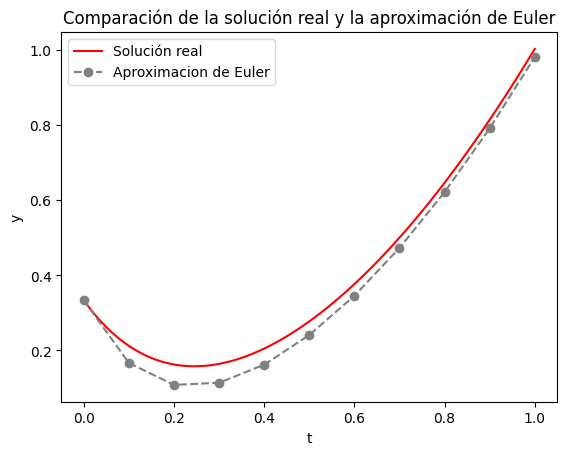

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Aqui se va a definir la función de la solución real
def solucion_real_euler(t):
    return t**2 + (1/3) * np.exp(-5*t)

# Aqui se define la ODE
def f(t, y):
    return -5*y + 5*t**2 + 2*t

# Parametros de la ODE
a = 0
b = 1
y_t0 = 1/3
N = 10

# Calcular el valor de h
h = (b - a) / N

# Se obtiene la aproximacion de Euler
ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

# Se obtiene los valores de la solucion real
ts_real = np.linspace(a, b, 100)
ys_real = solucion_real_euler(ts_real)

# El valor de h utilizado
print(f'El valor de h utilizado es: {h}')

# Graficar los resultados obtenidos de la aproximación de Euler
plt.plot(ts_real, ys_real, label='Solución real', color='red')
plt.plot(ts, ys, label='Aproximacion de Euler', linestyle='--', marker='o', color='gray')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Comparación de la solución real y la aproximación de Euler')
plt.show()

# Errores
Calcule el eeror relativo para diferentes valores de N.

In [36]:
def calcular_error_relativo(N):
    # Aqui se vuelve a calcular la aproximación de Euler con los nuevos valores de N
    ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)
    
    # Obtener los valores de la solución real correspondientes
    ts_real = np.linspace(a, b, N+1)
    ys_real = solucion_real_euler(ts_real)
    
    # Calcular el error relativo
    errores_relativos = np.abs((ys_real - ys) / ys_real)
    
    # Calcular el promedio del error relativo
    promedio_error_relativo = np.mean(errores_relativos)
    
    return promedio_error_relativo

# Calcular el promedio del error relativo para N = 10, 5, 20
Valores_nuevos_N = [10, 5, 20]
promedios_errores_relativos = [calcular_error_relativo(N) for N in Valores_nuevos_N]

# Mostrar los resultados en notación científica
resultados_para_nuevo_N = {N: error for N, error in zip(Valores_nuevos_N, promedios_errores_relativos)}
for N, error in resultados_para_nuevo_N.items():
    print(f"Para N={N}, el promedio del error relativo es: {error:.4e}")

Para N=10, el promedio del error relativo es: 1.2910e-01
Para N=5, el promedio del error relativo es: 2.7979e-01
Para N=20, el promedio del error relativo es: 6.3146e-02
